<a href="https://colab.research.google.com/github/ravitejalakkoju/covid-19-prediction-fyp/blob/main/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 38.34 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import ImageFolder
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(train_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(train_normal_names[:10])

print(len(train_covid_names), len(train_normal_names), len(test_covid_names), len(test_normal_names))

['COVID19(228).jpg', 'COVID19(563).jpg', 'COVID-19 (168).jpg', 'COVID19(519).jpg', 'COVID19(516).jpg', 'COVID19(134).jpg', 'COVID19(150).jpg', 'COVID19(9).jpg', 'COVID19(539).jpg', 'COVID19(274).jpg']
['NORMAL(1249).jpg', 'NORMAL(1138).jpg', 'NORMAL(1128).jpg', 'NORMAL(1279).jpg', 'NORMAL(180).jpg', 'NORMAL(529).jpg', 'NORMAL(1307).jpg', 'NORMAL(563).jpg', 'NORMAL(615).jpg', 'NORMAL(598).jpg']
['COVID19(228).jpg', 'COVID19(563).jpg', 'COVID-19 (168).jpg', 'COVID19(519).jpg', 'COVID19(516).jpg', 'COVID19(134).jpg', 'COVID19(150).jpg', 'COVID19(9).jpg', 'COVID19(539).jpg', 'COVID19(274).jpg']
['NORMAL(1249).jpg', 'NORMAL(1138).jpg', 'NORMAL(1128).jpg', 'NORMAL(1279).jpg', 'NORMAL(180).jpg', 'NORMAL(529).jpg', 'NORMAL(1307).jpg', 'NORMAL(563).jpg', 'NORMAL(615).jpg', 'NORMAL(598).jpg']
545 1266 167 317


In [ ]:
  print("train datset covid images :", len(train_covid_names))
print("train datset normal images :", len(train_normal_names))
print("test datset covid images :", len(test_covid_names))
print("test datset normal images :", len(test_normal_names))
print("Total train images :", len(train_covid_names + train_normal_names))
print("Total test images :", len(test_covid_names + test_normal_names))

train datset covid images : 545
train datset normal images : 1266
test datset covid images : 167
test datset normal images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID19(228).jpg', '/content/datasets/Data/train/COVID19/COVID19(563).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (168).jpg', '/content/datasets/Data/train/COVID19/COVID19(519).jpg', '/content/datasets/Data/train/COVID19/COVID19(516).jpg', '/content/datasets/Data/train/COVID19/COVID19(134).jpg', '/content/datasets/Data/train/COVID19/COVID19(150).jpg', '/content/datasets/Data/train/COVID19/COVID19(9).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1249).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1138).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1128).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1279).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(180).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(529).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1307).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(563).jpg']


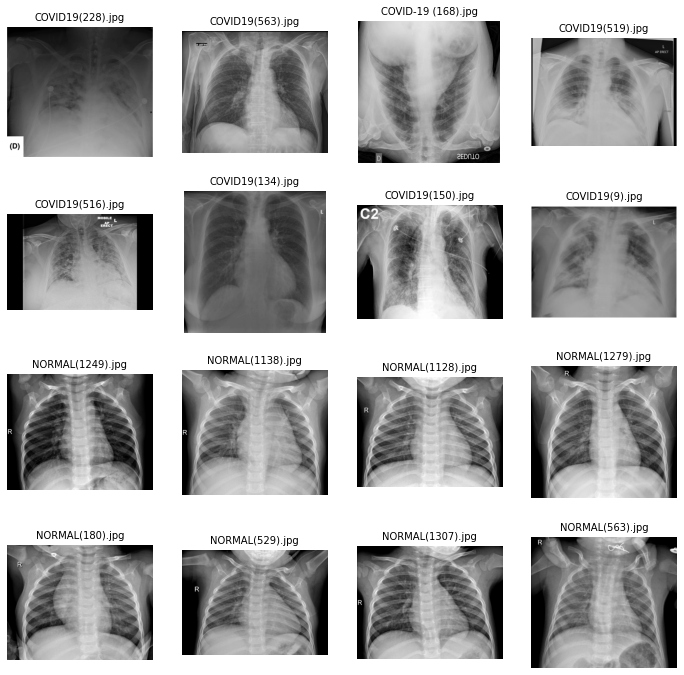

In [ ]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir, fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname)for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic + next_normal_pic) : 
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

In [ ]:
categorical_test_df = pd.DataFrame(columns =['class', 'o_directory', 'i_directory'])
categorical_train_df = pd.DataFrame(columns =['class', 'o_directory', 'i_directory'])
for dirpath, dirnames, filenames in os.walk(train_normal_dir):
    for filename in filenames:
        categorical_train_df.loc[-1] = ["NORMAL", ('NORMAL/' + filename), (train_normal_dir + '/' +filename) ] 
        categorical_train_df.index = categorical_train_df.index + 1 
        categorical_train_df = categorical_train_df.sort_index()
for dirpath, dirnames, filenames in os.walk(test_normal_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["NORMAL", ('NORMAL/' + filename), (test_normal_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index()  
for dirpath, dirnames, filenames in os.walk(train_covid_dir):
    for filename in filenames:
        categorical_train_df.loc[-1] = ["COVID19", ('COVID19/' + filename), (train_covid_dir + '/' +filename)] 
        categorical_train_df.index = categorical_train_df.index + 1 
        categorical_train_df = categorical_train_df.sort_index() 
for dirpath, dirnames, filenames in os.walk(test_covid_dir):
    for filename in filenames:
        categorical_test_df.loc[-1] = ["COVID19", ('COVID19/' + filename), (test_covid_dir + '/' +filename)] 
        categorical_test_df.index = categorical_test_df.index + 1 
        categorical_test_df = categorical_test_df.sort_index() 

In [ ]:
categorical_test_df

,class,o_directory,i_directory
0,COVID19,COVID19/COVID19(427).jpg,/content/datasets/Data/test/COVID19/COVID19(42...
1,COVID19,COVID19/COVID19(459).jpg,/content/datasets/Data/test/COVID19/COVID19(45...
2,COVID19,COVID19/COVID19(482).jpg,/content/datasets/Data/test/COVID19/COVID19(48...
3,COVID19,COVID19/COVID19(253).jpg,/content/datasets/Data/test/COVID19/COVID19(25...
4,COVID19,COVID19/COVID-19 (826).jpg,/content/datasets/Data/test/COVID19/COVID-19 (...
...,...,...,...
479,NORMAL,NORMAL/NORMAL(1510).jpg,/content/datasets/Data/test/NORMAL/NORMAL(1510...
480,NORMAL,NORMAL/NORMAL(123).jpg,/content/datasets/Data/test/NORMAL/NORMAL(123)...
481,NORMAL,NORMAL/NORMAL(255).jpg,/content/datasets/Data/test/NORMAL/NORMAL(255)...
482,NORMAL,NORMAL/NORMAL(973).jpg,/content/datasets/Data/test/NORMAL/NORMAL(973)...


In [ ]:
categorical_train_df

,class,o_directory,i_directory
0,COVID19,COVID19/COVID19(511).jpg,/content/datasets/Data/train/COVID19/COVID19(5...
1,COVID19,COVID19/COVID19(299).jpg,/content/datasets/Data/train/COVID19/COVID19(2...
2,COVID19,COVID19/COVID19(157).jpg,/content/datasets/Data/train/COVID19/COVID19(1...
3,COVID19,COVID19/COVID19(366).jpg,/content/datasets/Data/train/COVID19/COVID19(3...
4,COVID19,COVID19/COVID19(53).jpg,/content/datasets/Data/train/COVID19/COVID19(5...
...,...,...,...
1806,NORMAL,NORMAL/NORMAL(180).jpg,/content/datasets/Data/train/NORMAL/NORMAL(180...
1807,NORMAL,NORMAL/NORMAL(1279).jpg,/content/datasets/Data/train/NORMAL/NORMAL(127...
1808,NORMAL,NORMAL/NORMAL(1128).jpg,/content/datasets/Data/train/NORMAL/NORMAL(112...
1809,NORMAL,NORMAL/NORMAL(1138).jpg,/content/datasets/Data/train/NORMAL/NORMAL(113...


In [ ]:
print(len(os.listdir(train_covid_dir)))
print(len(os.listdir(test_covid_dir)))

545
167


In [ ]:
print(len(os.listdir(train_normal_dir)))
print(len(os.listdir(test_normal_dir)))

1266
317


In [ ]:
data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.2, 
                                    horizontal_flip = True)

data_gen.flow_from_directory(train_dir, 
              save_to_dir="./BinaryDataSet/train", 
              save_prefix = "covid", save_format = '.jpeg')

Found 1811 images belonging to 2 classes.


In [ ]:
image_size = (512, 512)

In [ ]:
train_data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.2)

val_data_gen = ImageDataGenerator(rescale  = 1./255)

test_data_gen = ImageDataGenerator(rescale  = 1./255)

train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     subset = 'training', 
                                                     batch_size = 16,
                                                     class_mode = 'binary')

val_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     subset = 'validation', 
                                                     batch_size = 16,
                                                     class_mode = 'binary')

test_generator = train_data_gen.flow_from_directory(test_dir,
                                                     target_size = image_size,
                                                     batch_size = 16,
                                                     class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(512, 512, 3)

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding = 'SAME', activation = 'relu', input_shape = (512,512,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5), padding = 'SAME', activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1048576)           0

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', keras.metrics.AUC(), keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
history = model.fit(train_generator,
                              epochs = 1,
                              validation_data = val_generator,
                              validation_steps = 10)

91/91 [==============================] - 58s 452ms/step - loss: 16.3070 - accuracy: 0.7936 - auc: 0.7865 - precision: 0.8457 - recall: 0.8570 - val_loss: 0.1562 - val_accuracy: 0.9375 - val_auc: 0.9826 - val_precision: 0.9732 - val_recall: 0.9397


In [ ]:
history = model.fit(train_generator,
                              epochs = 10,
                              validation_data = val_generator,
                              validation_steps = 10)

Epoch 1/10
91/91 [==============================] - 40s 437ms/step - loss: 0.1621 - accuracy: 0.9427 - auc: 0.9801 - precision: 0.9586 - recall: 0.9595 - val_loss: 0.2270 - val_accuracy: 0.9250 - val_auc: 0.9607 - val_precision: 0.9391 - val_recall: 0.9558
Epoch 2/10
91/91 [==============================] - 40s 435ms/step - loss: 0.1130 - accuracy: 0.9620 - auc: 0.9901 - precision: 0.9705 - recall: 0.9753 - val_loss: 0.1535 - val_accuracy: 0.9375 - val_auc: 0.9886 - val_precision: 0.9818 - val_recall: 0.9310
Epoch 3/10
91/91 [==============================] - 40s 434ms/step - loss: 0.0687 - accuracy: 0.9717 - auc: 0.9966 - precision: 0.9783 - recall: 0.9812 - val_loss: 0.1608 - val_accuracy: 0.9500 - val_auc: 0.9834 - val_precision: 0.9727 - val_recall: 0.9554
Epoch 4/10
91/91 [==============================] - 40s 437ms/step - loss: 0.0331 - accuracy: 0.9890 - auc: 0.9991 - precision: 0.9902 - recall: 0.9941 - val_loss: 0.2001 - val_accuracy: 0.9563 - val_auc: 0.9794 - val_precision: 

In [ ]:
history.history.keys()  

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])

In [ ]:
test_loss, test_acc, test_auc, test_precision, test_recall = model.evaluate(test_generator)
print('test_acc : {} test_loss : {}, test_auc: {}, test_precision: {}, test_recall: {}'.format(test_acc, test_loss, test_auc, test_precision, test_recall))

31/31 [==============================] - 11s 349ms/step - loss: 0.2658 - accuracy: 0.9483 - auc: 0.9761 - precision: 0.9479 - recall: 0.9748
test_acc : 0.9483470916748047 test_loss : 0.26582154631614685, test_auc: 0.9761044383049011, test_precision: 0.9478527903556824, test_recall: 0.9747633934020996


Text(0.5, 0, 'epoch')

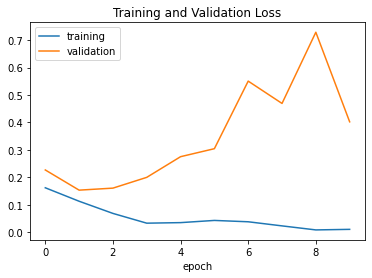

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

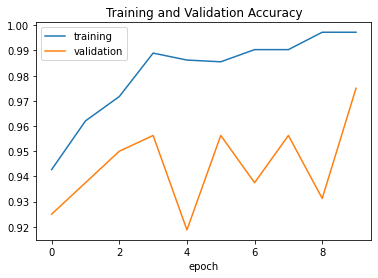

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

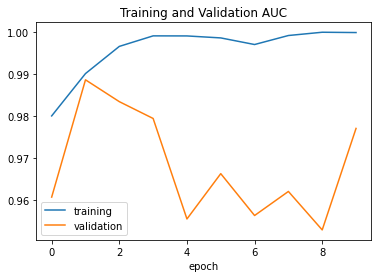

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.legend(['training','validation'])
plt.title('Training and Validation AUC')
plt.xlabel('epoch')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
print(target_names)

['COVID19', 'NORMAL']


In [ ]:
Y_pred = model.predict(test_generator)

In [ ]:
array = np.where((Y_pred < 0.1), 0, 1)

y_pred = np.array(array).flatten()

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

Confusion Matrix
[[ 48 119]
 [ 98 219]]


In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.33      0.29      0.31       167
      NORMAL       0.65      0.69      0.67       317

    accuracy                           0.55       484
   macro avg       0.49      0.49      0.49       484
weighted avg       0.54      0.55      0.54       484



In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.34      0.50      0.40       167
      NORMAL       0.65      0.49      0.55       317

    accuracy                           0.49       484
   macro avg       0.49      0.49      0.48       484
weighted avg       0.54      0.49      0.50       484



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)
  print(fn)
  if classes == 0:
    print('Covid19')
  else :
    print('Normal')

Saving covid.jpg to covid.jpg
Saving covid2.gif to covid2.gif
Saving covid3.jpg to covid3.jpg
Saving normal2.jpg to normal2.jpg
/content/covid.jpg
[[1.]]
covid.jpg
Normal
/content/covid2.gif
[[5.535919e-23]]
covid2.gif
Normal
/content/covid3.jpg
[[9.812764e-22]]
covid3.jpg
Normal
/content/normal2.jpg
[[1.]]
normal2.jpg
Normal


In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
mod = load_model('model.h5')
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = mod.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else :
    print('Normal')

In [ ]:
from keras import models
from keras.models import Model
from keras.models import Sequential
from keras import layers
from keras.applications import VGG16
from keras.applications.densenet import DenseNet121
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [ ]:
conv_base = DenseNet121(weights='imagenet',
 include_top=False,
 input_shape=(512, 512, 3))
conv_base.trainable = False
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
import keras

In [ ]:
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

In [ ]:
image_size = (512, 512)

In [ ]:
train_data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale  = 1./255)


train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     subset = 'training', 
                                                     batch_size = 32,
                                                     class_mode = 'binary')

val_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = image_size,
                                                     subset = 'validation', 
                                                     batch_size = 32,
                                                     class_mode = 'binary')

test_generator = test_data_gen.flow_from_directory(test_dir,
                                                     target_size = image_size,
                                                     batch_size = 32,
                                                     class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
result = model.fit(train_generator,
 validation_data = val_generator,
 epochs= 3
 )

Epoch 1/3
46/46 [==============================] - 62s 1s/step - loss: 0.6623 - accuracy: 0.9919 - precision_2: 0.9961 - recall_2: 0.9924 - auc_1: 0.9928 - val_loss: 5.4837 - val_accuracy: 0.9199 - val_precision_2: 1.0000 - val_recall_2: 0.8854 - val_auc_1: 0.9447
Epoch 2/3
46/46 [==============================] - 50s 1s/step - loss: 1.0362 - accuracy: 0.9773 - precision_2: 0.9897 - recall_2: 0.9772 - auc_1: 0.9780 - val_loss: 0.3812 - val_accuracy: 0.9945 - val_precision_2: 0.9960 - val_recall_2: 0.9960 - val_auc_1: 0.9980
Epoch 3/3
46/46 [==============================] - 50s 1s/step - loss: 0.1090 - accuracy: 0.9979 - precision_2: 0.9974 - recall_2: 0.9995 - auc_1: 0.9967 - val_loss: 0.3562 - val_accuracy: 0.9834 - val_precision_2: 0.9805 - val_recall_2: 0.9960 - val_auc_1: 0.9797


In [ ]:
test_loss, test_acc, test_precision, test_recall, test_auc = model.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc, test_loss, test_precision, test_recall))

16/16 [==============================] - 13s 818ms/step - loss: 0.6750 - accuracy: 0.9835 - precision_2: 0.9754 - recall_2: 1.0000 - auc_1: 0.9790
test_acc : 0.9834710955619812 test_loss : 0.675001323223114 test_precision: 0.9753845930099487, test_recall: 1.0


In [ ]:
Y_pred = model.predict(test_generator)

In [ ]:
f1_score = (2* test_precision * test_recall) / (test_precision + test_recall)

In [ ]:
print(f1_score)

0.9875389293420862


In [ ]:
y_pred = np.array(Y_pred).flatten()

In [ ]:
array = np.where((Y_pred > 0.9), 1, 0)

y_pred = np.array(array).flatten()

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)
# plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

Confusion Matrix
[[ 56 111]
 [103 214]]


In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
print('Classification Report')

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     COVID19       0.35      0.34      0.34       167
      NORMAL       0.66      0.68      0.67       317

    accuracy                           0.56       484
   macro avg       0.51      0.51      0.51       484
weighted avg       0.55      0.56      0.56       484



In [ ]:
def f1_score(test_precision, test_recall): 
  return ((2* test_precision * test_recall) / (test_precision + test_recall))

In [ ]:
conv_base = ResNet50(weights='imagenet',
 include_top=False,
 input_shape=(512, 512, 3))
conv_base.trainable = False
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base = InceptionV3(weights='imagenet',
 include_top=False,
 input_shape=(512, 512, 3))
conv_base.trainable = False
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(512, 512, 3))
conv_base.trainable = False
model4 = models.Sequential()
model4.add(conv_base)
model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras.applications import InceptionResNetV2

In [ ]:
conv_base = InceptionResNetV2(weights='imagenet',
 include_top=False,
 input_shape=(512, 512, 3))
conv_base.trainable = False
model5 = models.Sequential()
model5.add(conv_base)
model5.add(layers.Flatten())
model5.add(layers.Dense(256, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
model2.compile(loss='binary_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

In [ ]:
model3.compile(loss='binary_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

In [ ]:
model4.compile(loss='binary_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

In [ ]:
model5.compile(loss='binary_crossentropy',
 optimizer=optimizers.Adam(lr=0.001),
 metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

In [ ]:
result2 = model2.fit(train_generator,
 validation_data = val_generator,
 epochs= 2
 )

Epoch 1/2
46/46 [==============================] - 53s 1s/step - loss: 0.6874 - accuracy: 0.6991 - precision_7: 0.6991 - recall_7: 1.0000 - auc_6: 0.5284 - val_loss: 0.6849 - val_accuracy: 0.6989 - val_precision_7: 0.6989 - val_recall_7: 1.0000 - val_auc_6: 0.5000
Epoch 2/2
46/46 [==============================] - 50s 1s/step - loss: 0.6821 - accuracy: 0.6991 - precision_7: 0.6991 - recall_7: 1.0000 - auc_6: 0.4991 - val_loss: 0.6794 - val_accuracy: 0.6989 - val_precision_7: 0.6989 - val_recall_7: 1.0000 - val_auc_6: 0.5000


In [ ]:
test_loss2, test_acc2, test_precision2, test_recall2, test_auc2 = model2.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc2, test_loss2, test_precision2, test_recall2))

16/16 [==============================] - 14s 858ms/step - loss: 0.6826 - accuracy: 0.6550 - precision_7: 0.6550 - recall_7: 1.0000 - auc_6: 0.5000
test_acc : 0.6549586653709412 test_loss : 0.6825574636459351 test_precision: 0.6549586653709412, test_recall: 1.0


In [ ]:
print(f1_score(test_precision2, test_recall2))

0.7915106027426241


In [ ]:
result3 = model3.fit(train_generator,
 validation_data = val_generator,
 epochs= 5
 )

Epoch 1/5
46/46 [==============================] - 58s 1s/step - loss: 3.0482 - accuracy: 0.9138 - precision_5: 0.9233 - recall_5: 0.9578 - auc_4: 0.9193 - val_loss: 3.5258 - val_accuracy: 0.9779 - val_precision_5: 1.0000 - val_recall_5: 0.9684 - val_auc_4: 0.9842
Epoch 2/5
46/46 [==============================] - 50s 1s/step - loss: 1.3876 - accuracy: 0.9843 - precision_5: 0.9935 - recall_5: 0.9842 - auc_4: 0.9867 - val_loss: 1.1730 - val_accuracy: 0.9890 - val_precision_5: 0.9882 - val_recall_5: 0.9960 - val_auc_4: 0.9843
Epoch 3/5
46/46 [==============================] - 49s 1s/step - loss: 0.2527 - accuracy: 0.9980 - precision_5: 0.9994 - recall_5: 0.9979 - auc_4: 0.9982 - val_loss: 1.5756 - val_accuracy: 0.9890 - val_precision_5: 1.0000 - val_recall_5: 0.9842 - val_auc_4: 0.9921
Epoch 4/5
46/46 [==============================] - 50s 1s/step - loss: 0.0555 - accuracy: 0.9990 - precision_5: 0.9995 - recall_5: 0.9991 - auc_4: 0.9990 - val_loss: 2.3329 - val_accuracy: 0.9862 - val_pre

In [ ]:
test_loss3, test_acc3, test_precision3, test_recall3, test_auc3 = model3.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc3, test_loss3, test_precision3, test_recall3))

16/16 [==============================] - 14s 860ms/step - loss: 1.7207 - accuracy: 0.9897 - precision_5: 0.9937 - recall_5: 0.9905 - auc_4: 0.9893
test_acc : 0.9896694421768188 test_loss : 1.7206534147262573 test_precision: 0.9936708807945251, test_recall: 0.9905362725257874


In [ ]:
print(f1_score(test_precision3, test_recall3))

0.9921011006664119


In [ ]:
result4 = model4.fit(train_generator,
 validation_data = val_generator,
 epochs= 1
 )

46/46 [==============================] - 53s 1s/step - loss: 0.0030 - accuracy: 0.9993 - precision_6: 1.0000 - recall_6: 0.9990 - auc_5: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9862 - val_precision_6: 0.9844 - val_recall_6: 0.9960 - val_auc_5: 0.9992


In [ ]:
test_loss4, test_acc4, test_precision4, test_recall4, test_auc4 = model4.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc4, test_loss4, test_precision4, test_recall4))

16/16 [==============================] - 13s 794ms/step - loss: 0.0243 - accuracy: 0.9876 - precision_6: 0.9844 - recall_6: 0.9968 - auc_5: 0.9998
test_acc : 0.9876033067703247 test_loss : 0.024280361831188202 test_precision: 0.9844236969947815, test_recall: 0.9968454241752625


In [ ]:
print(f1_score(test_precision4, test_recall4))

0.9905956210728433


In [ ]:
result5 = model5.fit(train_generator,
 validation_data = val_generator,
 epochs= 3
 )

Epoch 1/3
46/46 [==============================] - 70s 1s/step - loss: 8.9015 - accuracy: 0.9012 - precision_8: 0.9370 - recall_8: 0.9135 - auc_7: 0.9118 - val_loss: 0.6836 - val_accuracy: 0.9807 - val_precision_8: 0.9767 - val_recall_8: 0.9960 - val_auc_7: 0.9751
Epoch 2/3
46/46 [==============================] - 54s 1s/step - loss: 0.0964 - accuracy: 0.9976 - precision_8: 0.9967 - recall_8: 1.0000 - auc_7: 0.9958 - val_loss: 1.9298 - val_accuracy: 0.9779 - val_precision_8: 1.0000 - val_recall_8: 0.9684 - val_auc_7: 0.9842
Epoch 3/3
46/46 [==============================] - 53s 1s/step - loss: 0.1111 - accuracy: 0.9978 - precision_8: 0.9992 - recall_8: 0.9976 - auc_7: 0.9979 - val_loss: 0.2925 - val_accuracy: 0.9945 - val_precision_8: 0.9960 - val_recall_8: 0.9960 - val_auc_7: 0.9934


In [ ]:
test_loss5, test_acc5, test_precision5, test_recall5, test_auc5 = model5.evaluate(test_generator)
print('test_acc : {} test_loss : {} test_precision: {}, test_recall: {}'.format(test_acc5, test_loss5, test_precision5, test_recall5))

16/16 [==============================] - 14s 843ms/step - loss: 0.1070 - accuracy: 0.9959 - precision_8: 0.9937 - recall_8: 1.0000 - auc_7: 0.9940
test_acc : 0.9958677887916565 test_loss : 0.10696034878492355 test_precision: 0.9937304258346558, test_recall: 1.0


In [ ]:
print(f1_score(test_precision5, test_recall5))

0.9968553551251947


In [ ]:
Y_pred = model4.predict(test_generator)

Confusion Matrix
[[ 57 110]
 [108 209]]
Confusion matrix, without normalization


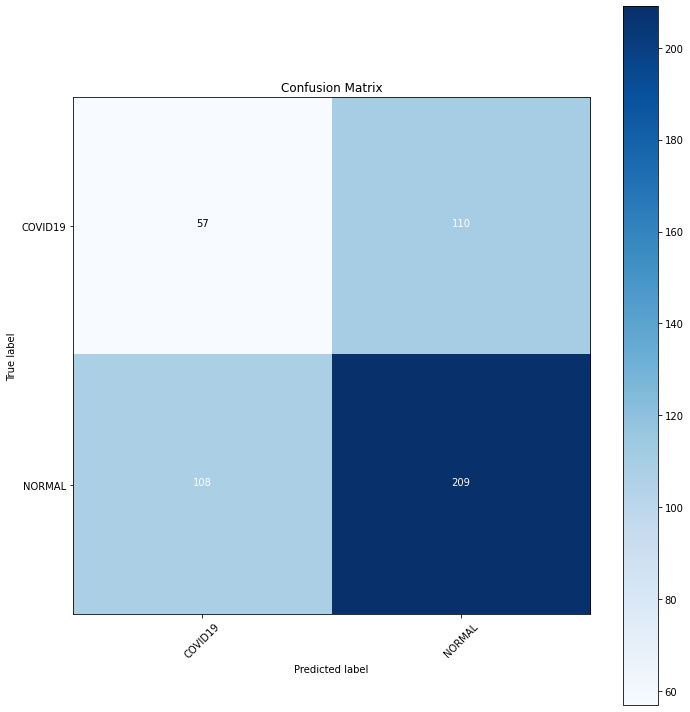

In [ ]:
array = np.where((Y_pred > 0.1), 1, 0)

y_pred = np.array(array).flatten()

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
train_dir = pathlib.Path(train_dir)
test_dir = pathlib.Path(test_dir)

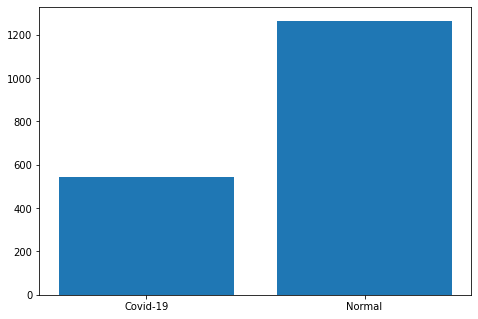

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Covid-19', 'Normal']
students = [len(list(train_dir.glob('*COVID19/*'))), len(list(train_dir.glob('*NORMAL/*')))]
ax.bar(langs,students)
plt.show()

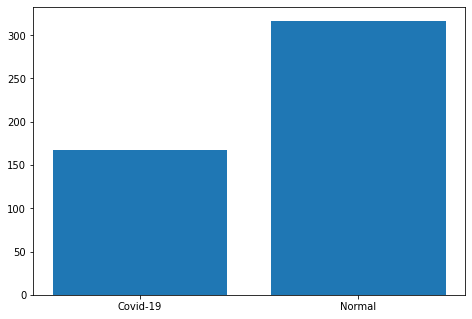

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Covid-19', 'Normal']
students = [len(list(test_dir.glob('*COVID19/*'))), len(list(test_dir.glob('*NORMAL/*')))]
ax.bar(langs,students)
plt.show()